<a href="https://colab.research.google.com/github/Dicti93/BNetzA/blob/main/Chloe/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! pip install geopy
# ! pip install geopandas matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/EVS4_20140118_dataV9.xlsx', sheet_name='DatasetV9', na_values=['#NUM!'])
df.fillna(0, inplace=True)

# Deselect columns that have all observations with 0
df = df.loc[:, (df != 0).any(axis=0)]
df


,BNR_NNR,cTOTEXn,cTOTEXs,cTOTEXs_RP3,cTOTEXn_RP3,BNR,dmu,dDateData,dmuName,yConnections.N1,...,rUsageHours.delivered.N1,rUsageHours.delivered.N2,rUsageHours.delivered.N3,rUsageHours.delivered.N4,rUsageHours.delivered.N5,rUsageHours.delivered.N6,rUsageHours.delivered.N7,rUsageHours.delivered.tot,NameOrg,NameShort
0,10000110_1,1.251883e+07,1.249888e+07,11228047.16,1.098298e+07,10000110,1,21.10.2022,Stadtwerke Schweinfurt GmbH,0,...,0.0,0.0,4548.121776,5266.842749,5515.732489,5254.048282,5585.184883,17507.884137,10000110,110
1,10000127_1,1.368348e+07,1.369353e+07,13163748.75,1.299756e+07,10000127,2,13.10.2023,EWR GmbH,0,...,0.0,0.0,0.000000,0.000000,5304.468460,5184.437559,5301.788227,10215.105174,10000127,127
2,10000140_1,1.222117e+07,1.240167e+07,10428259.02,1.034926e+07,10000140,3,09.10.2023,Vereinigte Wertach-Elektrizitätswerke GmbH,0,...,0.0,0.0,0.000000,0.000000,4555.657140,4182.364168,5217.071361,12847.714358,10000140,140
3,10000148_1,7.565416e+06,7.593657e+06,7223779.68,7.208622e+06,10000148,4,01.12.2022,Stadtwerke Elmshorn,0,...,0.0,0.0,0.000000,0.000000,5570.777849,5026.820471,5274.074586,13089.863083,10000148,148
4,10000150_1,9.376233e+06,9.742013e+06,9314366.51,8.542816e+06,10000150,5,05.08.2022,Überlandwerk Leinetal GmbH,0,...,0.0,0.0,0.000000,0.000000,6619.805504,5047.906480,4712.760490,15215.853338,10000150,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,10011648_1,1.597157e+07,1.607755e+07,0.00,0.000000e+00,10011648,193,06.06.2023,CPM Netz GmbH,0,...,0.0,0.0,7736.952218,7964.774979,7990.937174,7832.049411,7279.775487,18707.075310,10011648,11648
190,10012047_1,8.852484e+07,8.672744e+07,0.00,0.000000e+00,10012047,195,07.10.2022,Stuttgart Netze GmbH,0,...,0.0,0.0,5958.601247,5858.146472,5939.407724,5306.909255,5445.160400,21323.025753,10012047,12047
191,10012048_1,1.115529e+07,1.114285e+07,0.00,0.000000e+00,10012048,196,10.10.2023,LeineNetz GmbH,0,...,0.0,0.0,0.000000,0.000000,5305.011245,4945.429877,5404.051035,13704.526845,10012048,12048
192,10012071_1,8.900054e+07,8.389062e+07,0.00,0.000000e+00,10012071,197,10.10.2023,e-netz Südhessen AG,0,...,0.0,0.0,4793.770958,4765.503181,4980.943694,4850.647490,4861.244188,20021.746876,10012071,12071


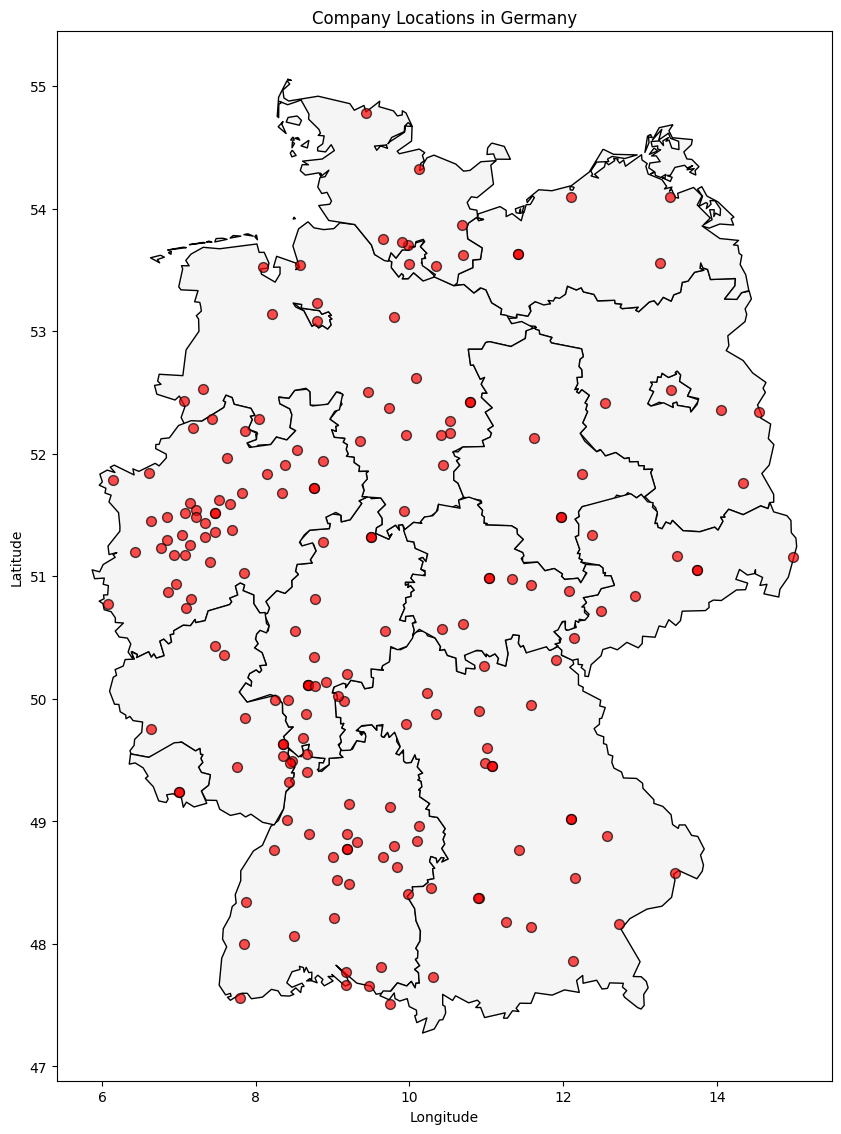

In [3]:
# Load your data
df = pd.read_excel('/EVS4_20140118_dataV9.xlsx', sheet_name='DatasetV9', na_values=['#NUM!'])
df.fillna(0, inplace=True)

# Deselect columns that have all observations with 0
df = df.loc[:, (df != 0).any(axis=0)]

# Company to city mapping dictionary
company_city_mapping = {
    "Stadtwerke Schweinfurt GmbH": ("Schweinfurt, Germany", 50.048, 10.232),
    "EWR GmbH": ("Worms, Germany", 49.631, 8.360),
    "Vereinigte Wertach-Elektrizitätswerke GmbH": ("Günzburg, Germany", 48.454, 10.278),
    "Stadtwerke Elmshorn": ("Elmshorn, Germany", 53.753, 9.653),
    "Überlandwerk Leinetal GmbH": ("Neustadt am Rübenberge, Germany", 52.506, 9.457),
    "Stadtwerke Wolfenbüttel GmbH": ("Wolfenbüttel, Germany", 52.164, 10.533),
    "Energie- und Wasserversorgung Rheine GmbH": ("Rheine, Germany", 52.283, 7.437),
    "infra fürth gmbh": ("Fürth, Germany", 49.477, 10.988),
    "Stadtwerke Bamberg Energie- und Wasserversorgungs GmbH": ("Bamberg, Germany", 49.898, 10.900),
    "Stadtwerke Hof Energie+Wasser GmbH": ("Hof, Germany", 50.313, 11.913),
    "Dessauer Stromversorgung GmbH": ("Dessau, Germany", 51.832, 12.240),
    "Überlandwerk Rhön GmbH": ("Meiningen, Germany", 50.570, 10.425),
    "Stadtwerke GmbH Bad Kreuznach": ("Bad Kreuznach, Germany", 49.842, 7.867),
    "Stadtwerke Ratingen GmbH": ("Ratingen, Germany", 51.297, 6.850),
    "Zwickauer Energieversorgung GmbH": ("Zwickau, Germany", 50.718, 12.491),
    "Stadtwerke Lünen GmbH": ("Lünen, Germany", 51.618, 7.527),
    "Stadtwerke Passau GmbH": ("Passau, Germany", 48.574, 13.456),
    "Stadtwerke Schwäbisch Hall GmbH": ("Schwäbisch Hall, Germany", 49.112, 9.741),
    "Stadtwerke Troisdorf GmbH": ("Troisdorf, Germany", 50.816, 7.157),
    "Stadtwerke Ingolstadt Netze GmbH": ("Ingolstadt, Germany", 48.766, 11.425),
    "Stadtwerke Marburg GmbH": ("Marburg, Germany", 50.812, 8.769),
    "Albwerk GmbH & Co. KG": ("Geislingen an der Steige, Germany", 48.624, 9.834),
    "Stadtwerke Sindelfingen GmbH": ("Sindelfingen, Germany", 48.707, 9.005),
    "Stadtwerke Tübingen GmbH": ("Tübingen, Germany", 48.522, 9.053),
    "Stadtwerke Ochtrup": ("Ochtrup, Germany", 52.209, 7.189),
    "Stadtwerke Witten GmbH": ("Witten, Germany", 51.433, 7.336),
    "Stadtwerke Schwäbisch Gmünd GmbH": ("Schwäbisch Gmünd, Germany", 48.798, 9.798),
    "Stadtwerke Weinheim GmbH": ("Weinheim, Germany", 49.547, 8.666),
    "GGEW AG, Gruppen-Gas- und Elektrizitätswerk Bergstraße AG": ("Bensheim, Germany", 49.679, 8.619),
    "Stadtwerke Fürstenfeldbruck GmbH": ("Fürstenfeldbruck, Germany", 48.175, 11.255),
    "Energie Waldeck-Frankenberg GmbH": ("Korbach, Germany", 51.275, 8.874),
    "Stadtwerke Speyer GmbH": ("Speyer, Germany", 49.316, 8.431),
    "StWB Stadtwerke Brandenburg an der Havel GmbH & Co. KG": ("Brandenburg an der Havel, Germany", 52.416, 12.547),
    "Elektroenergieversorgung Cottbus GmbH": ("Cottbus, Germany", 51.759, 14.334),
    "Hertener Stadtwerke GmbH": ("Herten, Germany", 51.597, 7.142),
    "Stadtwerke Görlitz AG": ("Görlitz, Germany", 51.156, 14.988),
    "Stadtwerke Schneverdingen-Neuenkirchen GmbH": ("Schneverdingen, Germany", 53.114, 9.796),
    "Stadtwerke Lippstadt GmbH": ("Lippstadt, Germany", 51.675, 8.344),
    "Stadtwerke Herne AG": ("Herne, Germany", 51.538, 7.221),
    "Stadtwerke Detmold GmbH": ("Detmold, Germany", 51.938, 8.878),
    "TraveNetz GmbH": ("Lübeck, Germany", 53.865, 10.686),
    "Neubrandenburger Stadtwerke GmbH": ("Neubrandenburg, Germany", 53.556, 13.259),
    "Stadtwerke Waiblingen GmbH": ("Waiblingen, Germany", 48.832, 9.316),
    "Regionetz GmbH": ("Aachen, Germany", 50.774, 6.084),
    "e-werk Sachsenwald GmbH": ("Aumühle, Germany", 53.530, 10.343),
    "Stadtwerke Velbert GmbH": ("Velbert, Germany", 51.335, 7.043),
    "Stadtwerke Baden-Baden": ("Baden-Baden, Germany", 48.760, 8.239),
    "Netze BW": ("Stuttgart, Germany", 48.775, 9.182),
    "Stadtwerke Frankenthal GmbH": ("Frankenthal, Germany", 49.534, 8.353),
    "Stadtwerke Flensburg GmbH": ("Flensburg, Germany", 54.780, 9.439),
    "Stadtwerke Lingen GmbH": ("Lingen, Germany", 52.524, 7.312),
    "Stadtwerke Saarbrücken Netz AG": ("Saarbrücken, Germany", 49.237, 6.997),
    "Stadtwerke Norderstedt": ("Norderstedt, Germany", 53.705, 9.985),
    "Stadtwerke Bayreuth Energie und Wasser GmbH": ("Bayreuth, Germany", 49.944, 11.579),
    "SWP Stadtwerke Pforzheim GmbH & Co. KG": ("Pforzheim, Germany", 48.895, 8.698),
    "wesernetz Bremen GmbH": ("Bremen, Germany", 53.079, 8.801),
    "Stadtwerke Straubing Strom und Gas GmbH": ("Straubing, Germany", 48.882, 12.574),
    "SWM Infrastruktur GmbH & Co. KG": ("Munich, Germany", 48.135, 11.581),
    "BEW Netze GmbH": ("Wipperfürth, Germany", 51.117, 7.400),
    "Stadtwerke Kleve GmbH": ("Kleve, Germany", 51.788, 6.138),
    "Stadtwerke Konstanz GmbH": ("Konstanz, Germany", 47.663, 9.175),
    "Stadtwerke Rosenheim Netze GmbH": ("Rosenheim, Germany", 47.856, 12.127),
    "Energienetze Mittelrhein GmbH & Co. KG": ("Koblenz, Germany", 50.356, 7.593),
    "SWKiel Netz GmbH": ("Kiel, Germany", 54.323, 10.122),
    "Stadtwerke Landshut": ("Landshut, Germany", 48.537, 12.151),
    "Stadtwerke Hilden GmbH": ("Hilden, Germany", 51.171, 6.937),
    "LEW Verteilnetz GmbH": ("Augsburg, Germany", 48.371, 10.899),
    "Bielefelder Netz GmbH": ("Bielefeld, Germany", 52.029, 8.532),
    "Stadtwerke Elbtal GmbH": ("Meißen, Germany", 51.163, 13.480),
    "Celle-Uelzen Netz GmbH": ("Celle, Germany", 52.617, 10.082),
    "Stadtwerke Ulm/Neu-Ulm Netze GmbH": ("Ulm, Germany", 48.401, 9.987),
    "SWT Stadtwerke Trier Versorgungs-GmbH": ("Trier, Germany", 49.749, 6.637),
    "NRM Netzdienste Rhein-Main GmbH": ("Frankfurt, Germany", 50.110, 8.682),
    "LSW Netz GmbH & Co. KG": ("Wolfsburg, Germany", 52.423, 10.789),
    "Stadtwerke Villingen-Schwenningen GmbH": ("Villingen-Schwenningen, Germany", 48.063, 8.494),
    "Albstadtwerke GmbH": ("Albstadt, Germany", 48.211, 9.022),
    "Stadtwerke Aalen GmbH": ("Aalen, Germany", 48.837, 10.093),
    "ED Netze GmbH": ("Rheinfelden, Germany", 47.556, 7.792),
    "Stadtwerke Iserlohn GmbH": ("Iserlohn, Germany", 51.375, 7.696),
    "wesernetz Bremerhaven GmbH": ("Bremerhaven, Germany", 53.541, 8.575),
    "Stadtwerke Neustadt an der Weinstraße GmbH": ("Neustadt an der Weinstraße, Germany", 49.350, 8.150),
    "Stadtwerke Neuwied GmbH": ("Neuwied, Germany", 50.433, 7.467),
    "GEW Wilhelmshaven GmbH": ("Wilhelmshaven, Germany", 53.520, 8.100),
    "GSW Gemeinschaftsstadtwerke GmbH Kamen, Bönen, Bergkamen": ("Kamen, Germany", 51.592, 7.662),
    "SÜC Energie und H2O GmbH": ("Coburg, Germany", 50.263, 10.964),
    "VW Kraftwerk GmbH": ("Wolfsburg, Germany", 52.423, 10.789),
    "Erlanger Stadtwerke AG": ("Erlangen, Germany", 49.593, 11.007),
    "Syna GmbH": ("Frankfurt, Germany", 50.110, 8.682),
    "Stadtwerke Hameln Weserbergland GmbH": ("Hameln, Germany", 52.102, 9.358),
    "Stadtwerke Lutherstadt Wittenberg GmbH": ("Lutherstadt Wittenberg, Germany", 51.865, 12.653),
    "Bocholter Energie- und Wasserversorgung GmbH": ("Bocholt, Germany", 51.840, 6.617),
    "EVI Energieversorgung Hildesheim GmbH & Co. KG": ("Hildesheim, Germany", 52.151, 9.951),
    "nvb Nordhorner Versorgungsbetriebe GmbH": ("Nordhorn, Germany", 52.426, 7.071),
    "Aschaffenburger Versorgungs-GmbH": ("Aschaffenburg, Germany", 49.979, 9.150),
    "Mitteldeutsche Netzgesellschaft Strom": ("Halle, Germany", 51.481, 11.970),
    "ÜZ Mainfranken eG": ("Lülsfeld, Germany", 49.872, 10.347),
    "Kreiswerke Main-Kinzig GmbH": ("Gelnhausen, Germany", 50.199, 9.191),
    "OsthessenNetz GmbH": ("Fulda, Germany", 50.552, 9.680),
    "SWS Netze Solingen GmbH": ("Solingen, Germany", 51.170, 7.085),
    "WSW Netz GmbH": ("Wuppertal, Germany", 51.256, 7.150),
    "NEW Netz GmbH": ("Mönchengladbach, Germany", 51.196, 6.435),
    "Stadtnetze Münster GmbH": ("Münster, Germany", 51.961, 7.626),
    "GeraNetz GmbH": ("Gera, Germany", 50.880, 12.082),
    "Vereinigte Stadtwerke Netz GmbH": ("Mölln, Germany", 53.619, 10.691),
    "AllgäuNetz GmbH & Co KG": ("Kempten, Germany", 47.726, 10.313),
    "Netzgesellschaft Schwerin mbH (NGS)": ("Schwerin, Germany", 53.629, 11.413),
    "Rheinische NETZGesellschaft mbH": ("Cologne, Germany", 50.937, 6.960),
    "ENWG Energienetze Weimar GmbH & Co. KG": ("Weimar, Germany", 50.980, 11.329),
    "ELE Verteilnetz GmbH": ("Gelsenkirchen, Germany", 51.517, 7.085),
    "TEN Thüringer Energienetze GmbH & Co. KG": ("Erfurt, Germany", 50.984, 11.029),
    "Stromnetz Berlin GmbH": ("Berlin, Germany", 52.520, 13.405),
    "Stromnetz Hamburg GmbH": ("Hamburg, Germany", 53.551, 9.994),
    "ovag Netz GmbH": ("Friedberg, Germany", 50.336, 8.753),
    "EWE NETZ GmbH": ("Oldenburg, Germany", 53.141, 8.214),
    "Bonn-Netz GmbH": ("Bonn, Germany", 50.737, 7.098),
    "AVU Netz GmbH": ("Gevelsberg, Germany", 51.319, 7.341),
    "Energieversorgung Halle Netz GmbH": ("Halle, Germany", 51.481, 11.970),
    "SachsenNetze HS.HD GmbH": ("Dresden, Germany", 51.050, 13.738),
    "Dortmunder Netz GmbH": ("Dortmund, Germany", 51.514, 7.466),
    "Netz Leipzig GmbH": ("Leipzig, Germany", 51.339, 12.374),
    "Netze Magdeburg GmbH": ("Magdeburg, Germany", 52.130, 11.627),
    "inetz GmbH": ("Chemnitz, Germany", 50.835, 12.929),
    "Überlandwerk Mittelbaden GmbH & Co. KG": ("Lahr, Germany", 48.342, 7.872),
    "Netz Duisburg GmbH": ("Duisburg, Germany", 51.434, 6.759),
    "N-ERGIE Netz GmbH": ("Nuremberg, Germany", 49.452, 11.076),
    "Stadtwerke Karlsruhe Netzservice GmbH": ("Karlsruhe, Germany", 49.006, 8.403),
    "Harz Energie Netz GmbH": ("Goslar, Germany", 51.904, 10.433),
    "MVV Netze GmbH": ("Mannheim, Germany", 49.487, 8.466),
    "Thüga Energienetze GmbH": ("Nuremberg, Germany", 49.452, 11.076),
    "SachsenNetze GmbH": ("Dresden, Germany", 51.050, 13.738),
    "EWR Netz GmbH": ("Worms, Germany", 49.631, 8.360),
    "enercity Netz GmbH": ("Hanover, Germany", 52.375, 9.732),
    "Netze ODR GmbH": ("Ellwangen, Germany", 48.961, 10.130),
    "TWL Netze GmbH": ("Ludwigshafen, Germany", 49.478, 8.445),
    "Pfalzwerke Netz AG": ("Ludwigshafen, Germany", 49.478, 8.445),
    "bnNETZE GmbH": ("Freiburg, Germany", 47.999, 7.842),
    "WEMAG Netz GmbH": ("Schwerin, Germany", 53.629, 11.413),
    "Stadtwerke Rostock Netzgesellschaft mbH": ("Rostock, Germany", 54.093, 12.099),
    "Mittelhessen Netz GmbH": ("Wetzlar, Germany", 50.554, 8.511),
    "Regensburg Netz GmbH": ("Regensburg, Germany", 49.019, 12.097),
    "energis-Netzgesellschaft mbH": ("Saarbrücken, Germany", 49.237, 6.997),
    "NHF Netzgesellschaft Heilbronn-Franken mbH": ("Heilbronn, Germany", 49.141, 9.220),
    "SWE Netz GmbH": ("Erfurt, Germany", 50.984, 11.029),
    "Oberhausener Netzgesellschaft mbH": ("Oberhausen, Germany", 51.478, 6.852),
    "Netzgesellschaft Düsseldorf mbH": ("Düsseldorf, Germany", 51.227, 6.773),
    "Mainfranken Netze GmbH": ("Würzburg, Germany", 49.791, 9.953),
    "Stadtwerke Suhl/ Zela-Mehlis Netz GmbH": ("Suhl, Germany", 50.611, 10.694),
    "Mainzer Netze GmbH": ("Mainz, Germany", 49.992, 8.247),
    "TWS Netz GmbH": ("Weingarten, Germany", 47.810, 9.634),
    "Stadtwerke Wiesbaden Netz GmbH": ("Wiesbaden, Germany", 50.078, 8.239),
    "Stadtwerke Ludwigsburg-Kornwestheim GmbH": ("Ludwigsburg, Germany", 48.897, 9.191),
    "Stadtwerke Ostmünsterland GmbH & Co. KG": ("Oelde, Germany", 51.830, 8.147),
    "Netzgesellschaft Frankfurt (Oder) mbH": ("Frankfurt (Oder), Germany", 52.339, 14.550),
    "Stadtwerke Heidelberg Netze GmbH": ("Heidelberg, Germany", 49.398, 8.672),
    "Energieversorgung Rüsselsheim GmbH": ("Rüsselsheim, Germany", 49.989, 8.421),
    "EWV Hamm GmbH": ("Hamm, Germany", 51.681, 7.819),
    "Schleswig-Holstein Netz AG": ("Quickborn, Germany", 53.728, 9.906),
    "Osterholzer Stadtwerke GmbH & Co. KG": ("Osterholz-Scharmbeck, Germany", 53.226, 8.796),
    "Braunschweiger Netz GmbH": ("Braunschweig, Germany", 52.268, 10.527),
    "Verteilnetz Plauen": ("Plauen, Germany", 50.497, 12.138),
    "NGN NETZGESELLSCHAFT NIEDERRHEIN MBH": ("Moers, Germany", 51.452, 6.632),
    "DB Energie GmbH": ("Frankfurt, Germany", 50.110, 8.682),
    "Netzgesellschaft Gütersloh mbH": ("Gütersloh, Germany", 51.906, 8.378),
    "Städtische Werke Netz + Service GmbH": ("Kassel, Germany", 51.315, 9.497),
    "Stadtwerke Bochum Netz GmbH": ("Bochum, Germany", 51.482, 7.219),
    "SWK Stadtwerke Kaiserslautern Versorgungs-AG": ("Kaiserslautern, Germany", 49.440, 7.750),
    "Stadtwerk am See GmbH & Co. KG": ("Friedrichshafen, Germany", 47.651, 9.479),
    "Hanau Netz GmbH": ("Hanau, Germany", 50.134, 8.915),
    "Leitungspartner GmbH": ("Hürth, Germany", 50.870, 6.865),
    "Westnetz GmbH": ("Dortmund, Germany", 51.514, 7.466),
    "Netzgesellschaft Potsdam GmbH": ("Potsdam, Germany", 52.390, 13.064),
    "SWO Netz GmbH": ("Osnabrück, Germany", 52.279, 8.047),
    "Energieversorgung Filstal GmbH & Co. KG": ("Göppingen, Germany", 48.703, 9.652),
    "BIGGE ENERGIE GmbH & Co. KG": ("Olpe, Germany", 51.028, 7.849),
    "EAM Netz GmbH": ("Kassel, Germany", 51.315, 9.497),
    "Regionalwerk Bodensee Netze GmbH & Co. KG": ("Überlingen, Germany", 47.768, 9.171),
    "Vorarlberger Energienetze GmbH": ("Bregenz, Austria", 47.505, 9.748),
    "FairNetz GmbH": ("Reutlingen, Germany", 48.485, 9.209),
    "Westfalen Weser Netz GmbH": ("Paderborn, Germany", 51.719, 8.754),
    "swa Netze GmbH": ("Augsburg, Germany", 48.371, 10.898),
    "ENERVIE Vernetzt GmbH": ("Hagen, Germany", 51.360, 7.471),
    "Mainnetz GmbH": ("Kleinostheim, Germany", 50.019, 9.069),
    "Energienetze Offenbach GmbH": ("Offenbach, Germany", 50.100, 8.768),
    "Stadtwerke Greifswald GmbH": ("Greifswald, Germany", 54.093, 13.388),
    "Avacon Netz GmbH": ("Salzgitter, Germany", 52.155, 10.413),
    "Bayernwerk Netz GmbH": ("Regensburg, Germany", 49.019, 12.097),
    "E.DIS Netz GmbH": ("Fürstenwalde, Germany", 52.357, 14.058),
    "Stadtwerke Jena Netze GmbH": ("Jena, Germany", 50.928, 11.587),
    "InfraServ Gendorf Netze GmbH": ("Burgkirchen, Germany", 48.158, 12.725),
    "CPM Netz GmbH": ("Paderborn, Germany", 51.719, 8.754),
    "Stuttgart Netze GmbH": ("Stuttgart, Germany", 48.775, 9.182),
    "LeineNetz GmbH": ("Göttingen, Germany", 51.532, 9.935),
    "e-netz Südhessen AG": ("Darmstadt, Germany", 49.872, 8.651),
    "SWTE Netz GmbH & Co. KG": ("Lengerich, Germany", 52.188, 7.860)
}

# Map the company names to cities and coordinates
df['City'] = df['dmuName'].map(lambda x: company_city_mapping.get(x, (None, None, None))[0])
df['Latitude'] = df['dmuName'].map(lambda x: company_city_mapping.get(x, (None, None, None))[1])
df['Longitude'] = df['dmuName'].map(lambda x: company_city_mapping.get(x, (None, None, None))[2])

# Drop rows where lat/long could not be found
df = df.dropna(subset=['Latitude', 'Longitude'])

# Load the GeoJSON file for Germany
germany_cities = gpd.read_file('/germany-states.geojson')

# Ensure GeoDataFrame consistency
germany_cities = germany_cities.to_crs(epsg=4326)  # Ensure CRS is compatible with latitude and longitude

# Create a GeoDataFrame from the company data
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs='EPSG:4326')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot Germany map
germany_cities.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot company locations
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Company Locations in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')


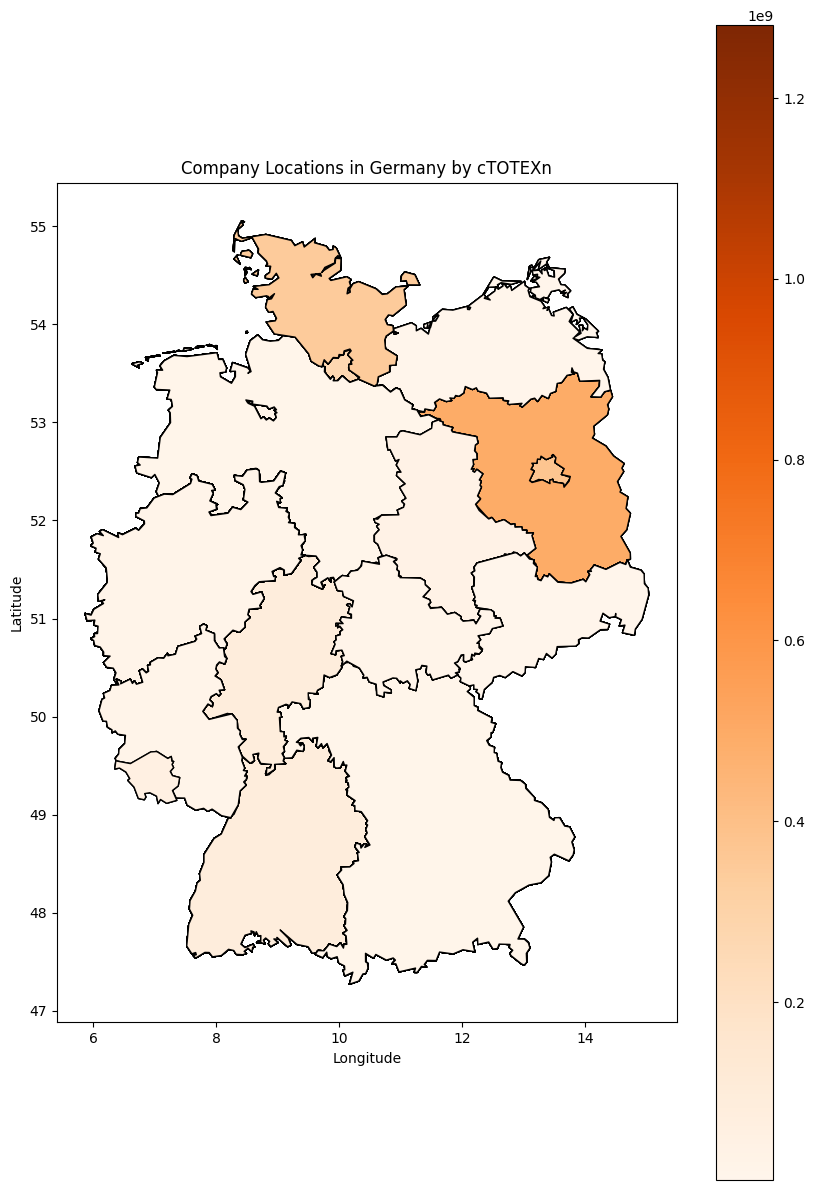

In [52]:
# Load your data
df = pd.read_excel('/EVS4_20140118_dataV9.xlsx', sheet_name='DatasetV9', na_values=['#NUM!'])
df.fillna(0, inplace=True)
df = df.loc[:, (df != 0).any(axis=0)]

# Company to city mapping dictionary
company_city_mapping = {
"Stadtwerke Schweinfurt GmbH": "Bayern",
"EWR GmbH": "Rheinland-Pfalz",
"Vereinigte Wertach-Elektrizitätswerke GmbH": "Bayern",
"Stadtwerke Elmshorn": "Schleswig-Holstein",
"Überlandwerk Leinetal GmbH": "Niedersachsen",
"Stadtwerke Wolfenbüttel GmbH": "Niedersachsen",
"Energie- und Wasserversorgung Rheine GmbH": "Nordrhein-Westfalen",
"infra fürth gmbh": "Bayern",
"Stadtwerke Bamberg Energie- und Wasserversorgungs GmbH": "Bayern",
"Stadtwerke Hof Energie+Wasser GmbH": "Bayern",
"Dessauer Stromversorgung GmbH": "Sachsen-Anhalt",
"Überlandwerk Rhön GmbH": "Bayern",
"Stadtwerke GmbH Bad Kreuznach": "Rheinland-Pfalz",
"Stadtwerke Ratingen GmbH": "Nordrhein-Westfalen",
"Zwickauer Energieversorgung GmbH": "Sachsen",
"Stadtwerke Lünen GmbH": "Nordrhein-Westfalen",
"Stadtwerke Passau GmbH": "Bayern",
"Stadtwerke Schwäbisch Hall GmbH": "Baden-Württemberg",
"Stadtwerke Troisdorf GmbH": "Nordrhein-Westfalen",
"Stadtwerke Ingolstadt Netze GmbH": "Bayern",
"Stadtwerke Marburg GmbH": "Hessen",
"Albwerk GmbH & Co. KG": "Baden-Württemberg",
"Stadtwerke Sindelfingen GmbH": "Baden-Württemberg",
"Stadtwerke Tübingen GmbH": "Baden-Württemberg",
"Stadtwerke Ochtrup": "Nordrhein-Westfalen",
"Stadtwerke Witten GmbH": "Nordrhein-Westfalen",
"Stadtwerke Schwäbisch Gmünd GmbH": "Baden-Württemberg",
"Stadtwerke Weinheim GmbH": "Baden-Württemberg",
"GGEW AG, Gruppen-Gas- und Elektrizitätswerk Bergstraße AG": "Hessen",
"Stadtwerke Fürstenfeldbruck GmbH": "Bayern",
"Energie Waldeck-Frankenberg GmbH": "Hessen",
"Stadtwerke Speyer GmbH": "Rheinland-Pfalz",
"StWB Stadtwerke Brandenburg an der Havel GmbH & Co. KG": "Brandenburg",
"Elektroenergieversorgung Cottbus GmbH": "Brandenburg",
"Hertener Stadtwerke GmbH": "Nordrhein-Westfalen",
"Stadtwerke Görlitz AG": "Sachsen",
"Stadtwerke Schneverdingen-Neuenkirchen GmbH": "Niedersachsen",
"Stadtwerke Lippstadt GmbH": "Nordrhein-Westfalen",
"Stadtwerke Herne AG": "Nordrhein-Westfalen",
"Stadtwerke Detmold GmbH": "Nordrhein-Westfalen",
"TraveNetz GmbH": "Schleswig-Holstein",
"Neubrandenburger Stadtwerke GmbH": "Mecklenburg-Vorpommern",
"Stadtwerke Waiblingen GmbH": "Baden-Württemberg",
"Regionetz GmbH": "Nordrhein-Westfalen",
"e-werk Sachsenwald GmbH": "Schleswig-Holstein",
"Stadtwerke Velbert GmbH": "Nordrhein-Westfalen",
"Stadtwerke Baden-Baden": "Baden-Württemberg",
"Netze BW": "Baden-Württemberg",
"Stadtwerke Frankenthal GmbH": "Rheinland-Pfalz",
"Stadtwerke Flensburg GmbH": "Schleswig-Holstein",
"Stadtwerke Lingen GmbH": "Niedersachsen",
"Stadtwerke Saarbrücken Netz AG": "Saarland",
"Stadtwerke Norderstedt": "Schleswig-Holstein",
"Stadtwerke Bayreuth Energie und Wasser GmbH": "Bayern",
"SWP Stadtwerke Pforzheim GmbH & Co. KG": "Baden-Württemberg",
"wesernetz Bremen GmbH": "Bremen",
"Stadtwerke Straubing Strom und Gas GmbH": "Bayern",
"SWM Infrastruktur GmbH & Co. KG": "Bayern",
"BEW Netze GmbH": "Nordrhein-Westfalen",
"Stadtwerke Kleve GmbH": "Nordrhein-Westfalen",
"Stadtwerke Konstanz GmbH": "Baden-Württemberg",
"Stadtwerke Rosenheim Netze GmbH": "Bayern",
"Energienetze Mittelrhein GmbH & Co. KG": "Rheinland-Pfalz",
"SWKiel Netz GmbH": "Schleswig-Holstein",
"Stadtwerke Landshut": "Bayern",
"Stadtwerke Hilden GmbH": "Nordrhein-Westfalen",
"LEW Verteilnetz GmbH": "Bayern",
"Bielefelder Netz GmbH": "Nordrhein-Westfalen",
"Stadtwerke Elbtal GmbH": "Sachsen",
"Celle-Uelzen Netz GmbH": "Niedersachsen",
"Stadtwerke Ulm/Neu-Ulm Netze GmbH": "Baden-Württemberg",
"SWT Stadtwerke Trier Versorgungs-GmbH": "Rheinland-Pfalz",
"NRM Netzdienste Rhein-Main GmbH": "Hessen",
"LSW Netz GmbH & Co. KG": "Niedersachsen",
"Stadtwerke Villingen-Schwenningen GmbH": "Baden-Württemberg",
"Albstadtwerke GmbH": "Baden-Württemberg",
"Stadtwerke Aalen GmbH": "Baden-Württemberg",
"ED Netze GmbH": "Baden-Württemberg",
"Stadtwerke Iserlohn GmbH": "Nordrhein-Westfalen",
"wesernetz Bremerhaven GmbH": "Bremen",
"Stadtwerke Neustadt an der Weinstraße GmbH": "Rheinland-Pfalz",
"Stadtwerke Neuwied GmbH": "Rheinland-Pfalz",
"GEW Wilhelmshaven GmbH": "Niedersachsen",
"GSW Gemeinschaftsstadtwerke GmbH Kamen, Bönen, Bergkamen": "Nordrhein-Westfalen",
"SÜC Energie und H2O GmbH": "Bayern",
"VW Kraftwerk GmbH": "Niedersachsen",
"Erlanger Stadtwerke AG": "Bayern",
"Syna GmbH": "Hessen",
"Stadtwerke Hameln Weserbergland GmbH": "Niedersachsen",
"Stadtwerke Lutherstadt Wittenberg GmbH": "Sachsen-Anhalt",
"Bocholter Energie- und Wasserversorgung GmbH": "Nordrhein-Westfalen",
"EVI Energieversorgung Hildesheim GmbH & Co. KG": "Niedersachsen",
"nvb Nordhorner Versorgungsbetriebe GmbH": "Niedersachsen",
"Aschaffenburger Versorgungs-GmbH": "Bayern",
"Mitteldeutsche Netzgesellschaft Strom": "Sachsen-Anhalt",
"ÜZ Mainfranken eG": "Bayern",
"Kreiswerke Main-Kinzig GmbH": "Hessen",
"OsthessenNetz GmbH": "Hessen",
"SWS Netze Solingen GmbH": "Nordrhein-Westfalen",
"WSW Netz GmbH": "Nordrhein-Westfalen",
"NEW Netz GmbH": "Nordrhein-Westfalen",
"Stadtnetze Münster GmbH": "Nordrhein-Westfalen",
"GeraNetz GmbH": "Thüringen",
"Vereinigte Stadtwerke Netz GmbH": "Schleswig-Holstein",
"AllgäuNetz GmbH & Co KG": "Bayern",
"Netzgesellschaft Schwerin mbH (NGS)": "Mecklenburg-Vorpommern",
"Rheinische NETZGesellschaft mbH": "Nordrhein-Westfalen",
"ENWG Energienetze Weimar GmbH & Co. KG": "Thüringen",
"ELE Verteilnetz GmbH": "Nordrhein-Westfalen",
"TEN Thüringer Energienetze GmbH & Co. KG": "Thüringen",
"Stromnetz Berlin GmbH": "Berlin",
"Stromnetz Hamburg GmbH": "Hamburg",
"ovag Netz GmbH": "Hessen",
"EWE NETZ GmbH": "Niedersachsen",
"Bonn-Netz GmbH": "Nordrhein-Westfalen",
"AVU Netz GmbH": "Nordrhein-Westfalen",
"Energieversorgung Halle Netz GmbH": "Sachsen-Anhalt",
"SachsenNetze HS.HD GmbH": "Sachsen",
"Dortmunder Netz GmbH": "Nordrhein-Westfalen",
"Netz Leipzig GmbH": "Sachsen",
"Netze Magdeburg GmbH": "Sachsen-Anhalt",
"inetz GmbH": "Sachsen",
"Überlandwerk Mittelbaden GmbH & Co. KG": "Baden-Württemberg",
"Netz Duisburg GmbH": "Nordrhein-Westfalen",
"N-ERGIE Netz GmbH": "Bayern",
"Stadtwerke Karlsruhe Netzservice GmbH": "Baden-Württemberg",
"Harz Energie Netz GmbH": "Niedersachsen",
"MVV Netze GmbH": "Baden-Württemberg",
"Thüga Energienetze GmbH": "Bayern",
"SachsenNetze GmbH": "Sachsen",
"EWR Netz GmbH": "Rheinland-Pfalz",
"enercity Netz GmbH": "Niedersachsen",
"Netze ODR GmbH": "Baden-Württemberg",
"TWL Netze GmbH": "Rheinland-Pfalz",
"Pfalzwerke Netz AG": "Rheinland-Pfalz",
"bnNETZE GmbH": "Baden-Württemberg",
"WEMAG Netz GmbH": "Mecklenburg-Vorpommern",
"Stadtwerke Rostock Netzgesellschaft mbH": "Mecklenburg-Vorpommern",
"Mittelhessen Netz GmbH": "Hessen",
"Regensburg Netz GmbH": "Bayern",
"energis-Netzgesellschaft mbH": "Saarland",
"NHF Netzgesellschaft Heilbronn-Franken mbH": "Baden-Württemberg",
"SWE Netz GmbH": "Thüringen",
"Oberhausener Netzgesellschaft mbH": "Nordrhein-Westfalen",
"Netzgesellschaft Düsseldorf mbH": "Nordrhein-Westfalen",
"Mainfranken Netze GmbH": "Bayern",
"Stadtwerke Suhl/ Zela-Mehlis Netz GmbH": "Thüringen",
"Mainzer Netze GmbH": "Rheinland-Pfalz",
"TWS Netz GmbH": "Baden-Württemberg",
"Stadtwerke Wiesbaden Netz GmbH": "Hessen",
"Stadtwerke Ludwigsburg-Kornwestheim GmbH": "Baden-Württemberg",
"Stadtwerke Ostmünsterland GmbH & Co. KG": "Nordrhein-Westfalen",
"Netzgesellschaft Frankfurt (Oder) mbH": "Brandenburg",
"Stadtwerke Heidelberg Netze GmbH": "Baden-Württemberg",
"Energieversorgung Rüsselsheim GmbH": "Hessen",
"EWV Hamm GmbH": "Nordrhein-Westfalen",
"Schleswig-Holstein Netz AG": "Schleswig-Holstein",
"Osterholzer Stadtwerke GmbH & Co. KG": "Niedersachsen",
"Braunschweiger Netz GmbH": "Niedersachsen",
"Verteilnetz Plauen": "Sachsen",
"NGN NETZGESELLSCHAFT NIEDERRHEIN MBH": "Nordrhein-Westfalen",
"DB Energie GmbH": "Hessen",
"Netzgesellschaft Gütersloh mbH": "Nordrhein-Westfalen",
"Städtische Werke Netz + Service GmbH": "Hessen",
"Stadtwerke Bochum Netz GmbH": "Nordrhein-Westfalen",
"SWK Stadtwerke Kaiserslautern Versorgungs-AG": "Rheinland-Pfalz",
"Stadtwerk am See GmbH & Co. KG": "Baden-Württemberg",
"Hanau Netz GmbH": "Hessen",
"Leitungspartner GmbH": "Nordrhein-Westfalen",
"Westnetz GmbH": "Nordrhein-Westfalen",
"Netzgesellschaft Potsdam GmbH": "Brandenburg",
"SWO Netz GmbH": "Niedersachsen",
"Energieversorgung Filstal GmbH & Co. KG": "Baden-Württemberg",
"BIGGE ENERGIE GmbH & Co. KG": "Nordrhein-Westfalen",
"EAM Netz GmbH": "Hessen",
"Regionalwerk Bodensee Netze GmbH & Co. KG": "Baden-Württemberg",
"Vorarlberger Energienetze GmbH": "Vorarlberg",
"FairNetz GmbH": "Baden-Württemberg",
"Westfalen Weser Netz GmbH": "Nordrhein-Westfalen",
"swa Netze GmbH": "Bayern",
"ENERVIE Vernetzt GmbH": "Nordrhein-Westfalen",
"Mainnetz GmbH": "Hessen",
"Energienetze Offenbach GmbH": "Hessen",
"Stadtwerke Greifswald GmbH": "Mecklenburg-Vorpommern",
"Avacon Netz GmbH": "Niedersachsen",
"Bayernwerk Netz GmbH": "Bayern",
"E.DIS Netz GmbH": "Brandenburg",
"Stadtwerke Jena Netze GmbH": "Thüringen",
"InfraServ Gendorf Netze GmbH": "Bayern",
"CPM Netz GmbH": "Nordrhein-Westfalen",
"Stuttgart Netze GmbH": "Baden-Württemberg",
"LeineNetz GmbH": "Niedersachsen",
"e-netz Südhessen AG": "Hessen",
"SWTE Netz GmbH & Co. KG": "Nordrhein-Westfalen"
}


# Map the company names to cities
df.loc[:, 'City'] = df['dmuName'].map(lambda x: company_city_mapping.get(x, None))
df = df.dropna(subset=['City'])

# Load the GeoJSON file (replace 'path_to_geojson' with the actual path)
germany_cities = gpd.read_file('/germany-states.geojson')

# Inspect column names
print(germany_cities.columns)

# Ensure city names match
df['City'] = df['City'].str.strip()
germany_cities['NAME_1'] = germany_cities['NAME_1'].str.strip()  # Update 'name' to correct column if necessary

# Merge your data with the geographic data
# Adjust 'name' to the actual column name in the GeoDataFrame if it's different
merged = germany_cities.merge(df, left_on='NAME_1', right_on='City')


# Define a colormap with more colors
cmap = sns.color_palette("Oranges", n_colors=20, as_cmap=True)  # Increase number of colors

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot Germany map with the merged data
germany_cities.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot the merged data
merged.plot(column='cTOTEXn', ax=ax, legend=True, cmap=cmap, edgecolor='black')

# Add titles and labels
plt.title('Company Locations in Germany by cTOTEXn')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()